In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split

In [147]:
input_path = '../input_data/Social_Network_Ads.csv'
df = pd.read_csv(input_path,sep='\t')
print(df.shape)
df.head()

(400, 5)


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


# Exploratory Data Analysis¶


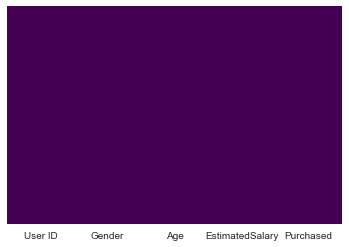

In [148]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')


In [149]:
df.isnull().sum().sort_values(ascending=False)


Purchased          0
EstimatedSalary    0
Age                0
Gender             0
User ID            0
dtype: int64

In [153]:
df['Gender'].value_counts()

Female    204
Male      196
Name: Gender, dtype: int64

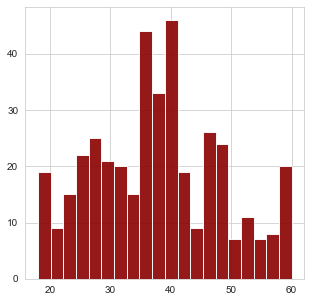

In [166]:
df['Age'].hist(bins=20,color='darkred',alpha=0.9, figsize=(5,5))


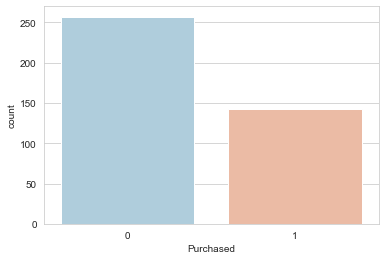

In [150]:
sns.set_style('whitegrid')
sns.countplot(x='Purchased',data=df,palette='RdBu_r')

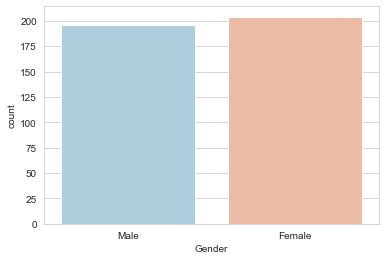

In [151]:
sns.set_style('whitegrid')
sns.countplot(x='Gender',data=df,palette='RdBu_r')

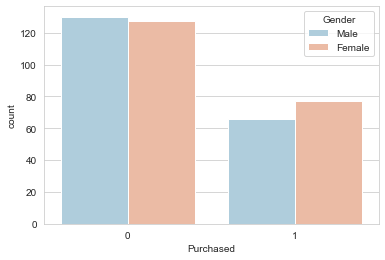

In [144]:
sns.set_style('whitegrid')
sns.countplot(x='Purchased',hue='Gender',data=df,palette='RdBu_r')

In [14]:
X = df.iloc[:, [2, 3]].values
y = df.iloc[:, 4].values

In [125]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 3)

In [126]:
type(X_train)

numpy.ndarray

In [127]:
print('train size : {}'.format(y_train.size))
print('test size : {}'.format(y_test.size))


train size : 300
test size : 100


In [128]:
t_pos = [i for i in y_test if i==1]
t_neg = [i for i in y_test if i==0]

print('test positives : {}'.format(len(t_pos)))
print('test negative : {}'.format(len(t_neg)))


test positives : 35
test negative : 65


In [129]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [130]:
#Creating and  Fitting  Decision Tree classifier to the Training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion="entropy",random_state=0,max_depth=3)
classifier.fit(X_train,y_train)
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [133]:

#Finding Training error 
classifier.fit(X_train,y_train).score(X_test, y_test)


0.9

In [114]:
y_pred

array([1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0])

In [115]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(y_test, y_pred)

In [122]:
#Applying K-fold cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier,X=X_train,y=y_train,cv=3)
mean = accuracies.mean()
sd = accuracies.std()

print(mean)
print(sd)

0.9033333333333333
0.018856180831641284


In [117]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.97      0.90      0.93        62
           1       0.86      0.95      0.90        38

    accuracy                           0.92       100
   macro avg       0.91      0.93      0.92       100
weighted avg       0.92      0.92      0.92       100



'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


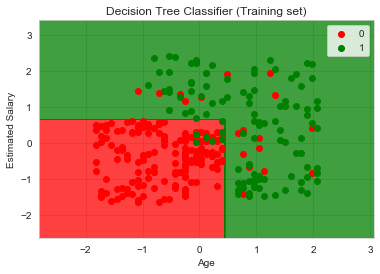

In [178]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Decision Tree Classifier (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


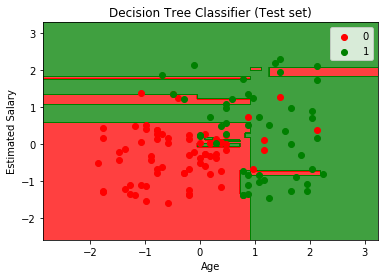

In [99]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Decision Tree Classifier (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [101]:
DecisionTreeClassifier()

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [167]:
from xgboost import XGBClassifier
xgboost = XGBClassifier(n_estimators=1000)
xgboost.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [168]:
xg_pred = xgboost.predict(X_test)

In [169]:
print(confusion_matrix(y_test,xg_pred))


[[57  8]
 [ 5 30]]


In [170]:
print(classification_report(y_test,xg_pred))


              precision    recall  f1-score   support

           0       0.92      0.88      0.90        65
           1       0.79      0.86      0.82        35

    accuracy                           0.87       100
   macro avg       0.85      0.87      0.86       100
weighted avg       0.87      0.87      0.87       100

